In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
# Full pathname to location of data file
fpath = "/Users/sophiafamely/Documents/ScienceFair2526/YELLOW/202769_20251109_1251-YELLOW\\202769_20251109_1251-YELLOW_data.txt"

# Use pandas to read the csv file, and convert the time column into an index
df = pd.read_csv(fpath, parse_dates=['Time'], index_col='Time')
# Making time the index "removes" the 'Time' column...add it back in
df['Time'] = df.index

# Define  time bounds (strings or datetime objects)
start_time = "2025-11-09 12:39:00"
end_time   = "2025-11-09 12:41:00"

# Trim the dataset
df = df.loc[start_time:end_time]

# Save to CSV
save_dir = '/Users/sophiafamely/Documents/ScienceFair2526/YELLOW/202769_20251109_1251-YELLOW\\202769_20251109_1251-YELLOW_data.txt'
df.to_csv(save_dir+'yellow_bucket.csv')

print(df.head())

                          Pressure  Sea pressure     Depth  \
Time                                                         
2025-11-09 12:39:00.000  10.195195      0.062695  0.062184   
2025-11-09 12:39:00.125  10.216782      0.084282  0.083595   
2025-11-09 12:39:00.250  10.239783      0.107283  0.106409   
2025-11-09 12:39:00.375  10.247731      0.115231  0.114291   
2025-11-09 12:39:00.500  10.266497      0.133997  0.132904   

                                           Time  
Time                                             
2025-11-09 12:39:00.000 2025-11-09 12:39:00.000  
2025-11-09 12:39:00.125 2025-11-09 12:39:00.125  
2025-11-09 12:39:00.250 2025-11-09 12:39:00.250  
2025-11-09 12:39:00.375 2025-11-09 12:39:00.375  
2025-11-09 12:39:00.500 2025-11-09 12:39:00.500  


In [5]:
# We are going to calculate depth from pressure ourselves, so delete the columns that RBR has calculated 
df =  df.drop(['Sea pressure', 'Depth'], axis=1)
# And show the remaining datad
df

,Pressure,Time
Time,,
2025-11-09 12:39:00.000,10.195195,2025-11-09 12:39:00.000
2025-11-09 12:39:00.125,10.216782,2025-11-09 12:39:00.125
2025-11-09 12:39:00.250,10.239783,2025-11-09 12:39:00.250
2025-11-09 12:39:00.375,10.247731,2025-11-09 12:39:00.375
2025-11-09 12:39:00.500,10.266497,2025-11-09 12:39:00.500
...,...,...
2025-11-09 12:41:00.375,10.187046,2025-11-09 12:41:00.375
2025-11-09 12:41:00.500,10.159957,2025-11-09 12:41:00.500
2025-11-09 12:41:00.625,10.132017,2025-11-09 12:41:00.625


In [6]:
# So, to calculate depth for the entire column in the dataframe
# we want to use the formula
# depth = ( pressure - p_atmos )/(rhow*g)
# but our pressures are in decibars, so we need to multiply by 10,000 to get Pascals

# Our value of atmospheric pressure is ?
p_atmos = 10.1325 # decibars - replace with value from our notes ---need to ask Mira
g = 9.80665 # gravitational acceleration (m s^-2)
rhow = 1000 # density of feshwater for bucket test (kg m^3) - replace with our measured value when we move to saltwater ---need to ask Mira

df['Depth'] = ( df['Pressure'] - p_atmos )*1e4 / (rhow*g)
df

,Pressure,Time,Depth
Time,,,
2025-11-09 12:39:00.000,10.195195,2025-11-09 12:39:00.000,0.063931
2025-11-09 12:39:00.125,10.216782,2025-11-09 12:39:00.125,0.085944
2025-11-09 12:39:00.250,10.239783,2025-11-09 12:39:00.250,0.109399
2025-11-09 12:39:00.375,10.247731,2025-11-09 12:39:00.375,0.117503
2025-11-09 12:39:00.500,10.266497,2025-11-09 12:39:00.500,0.136639
...,...,...,...
2025-11-09 12:41:00.375,10.187046,2025-11-09 12:41:00.375,0.055621
2025-11-09 12:41:00.500,10.159957,2025-11-09 12:41:00.500,0.027998
2025-11-09 12:41:00.625,10.132017,2025-11-09 12:41:00.625,-0.000493


In [7]:
df.describe()

,Pressure,Time,Depth
count,968.000000,968,968.000000
mean,10.252175,2025-11-09 12:40:00.437499904,0.122035
min,10.110206,2025-11-09 12:39:00,-0.022734
25%,10.252562,2025-11-09 12:39:30.218749952,0.122430
50%,10.252790,2025-11-09 12:40:00.437499904,0.122661
75%,10.253061,2025-11-09 12:40:30.656249856,0.122938
max,10.266497,2025-11-09 12:41:00.875000,0.136639
std,0.008724,NaN,0.008896


Text(0, 0.5, 'Depth (m)')

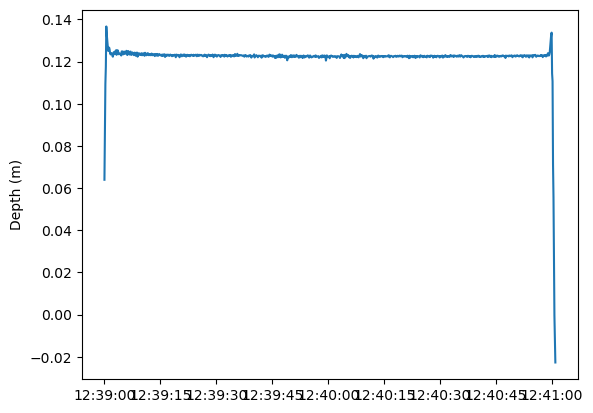

In [9]:
# make a quick plot of that data (we have to pick a subset, or it takes forever to plot)
import matplotlib.pyplot as plt

plt.plot( df['Time'], df['Depth'])
plt.ylabel( 'Depth (m)' )